In [20]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol
sp.init_printing()
import matplotlib.pyplot as plt
import numpy as np
import mpmath


In [21]:
# constants
Lc=sp.Symbol('L_c')
Lc=2 #CHANGEABLE
Vc=sp.Symbol('V_c')
Vc=3.125 #CHANGEABLE
h=sp.Symbol('\hbar')
h=1 #CHANGEABLE

In [22]:
# dimensional parameters
n=sp.Symbol('n')
n=255 #CHANGEABLE
A=sp.Symbol('A')
A=-3 #CHANGEABLE
B=sp.Symbol('B')
B=9 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)
C=sp.Symbol('C')
C=0.5 #CHANGEABLE
M=sp.Symbol('M')
M=1 #CHANGEABLE

In [23]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc

In [24]:
# dimensional grid
Xi=sp.Symbol('X_i')
Xi=np.linspace(A,B,n)
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a,b,n)

In [25]:
# dimensional  potential
V=sp.Function('V_{QHO}')
def V(X,C):
    return Vc*(np.exp(-2*C*X)-2*np.exp(-C*X))
# non-dimensional  potential
v=sp.Function('v_{QHO}')
def v(V):
    return V/Vc
vi=sp.Symbol('v_i')
vi=v(V(Xi,C))
Vi=V(Xi,C)

In [26]:
# auxiliary variables
alpha=sp.Symbol('\alpha')
alpha=(2*M*Vc)/(C*C*h*h)
vit=sp.Symbol('\widetilde{v_i}')
vit=s*s*alpha*vi

In [27]:
# hamiltonian operator
H=sp.MatrixSymbol('H',n,n)
H= -1*np.eye(n,n,k=-1) + (2+vit)*np.eye(n,n) + -1*np.eye(n,n,k=1)

In [28]:
# eigenvalues and eigenvectors
eigval=np.linalg.eigh(H)[0]
eigvec=np.linalg.eigh(H)[1]
(eigval)[1]/(s*s*alpha)

In [29]:
# transpose eigvec to make an easier to use array
Psi=eigvec.T
# Matrix(Psi)

Text(0, 0.5, '$\\psi_n(x)$')

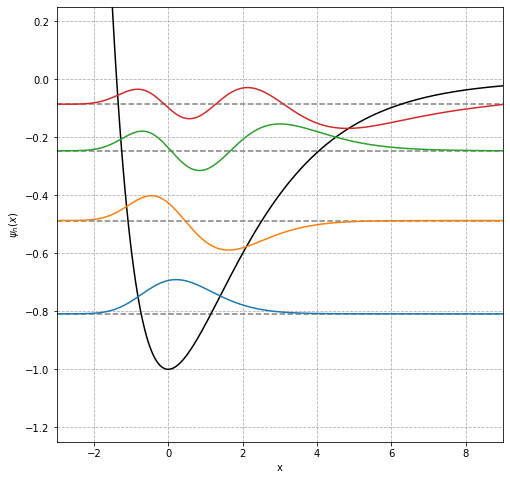

In [30]:
# graph of Morse eigenstates
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(-3,9)
plt.ylim(-1.25,0.25)
plt.plot(Xi,vi,color='black')
i=0
for i in range(0,4):
    if i == 0:
        plt.plot(Xi,-Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))
    else: 
        if (i % 4) == 3 or (i % 4) == 0:
            plt.plot(Xi,-Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))
        else:
            plt.plot(Xi,Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))  
    plt.hlines(eigval[i]/(s*s*alpha),A,B,color='grey',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

Text(0, 0.5, '$\\psi^2_n(x)$')

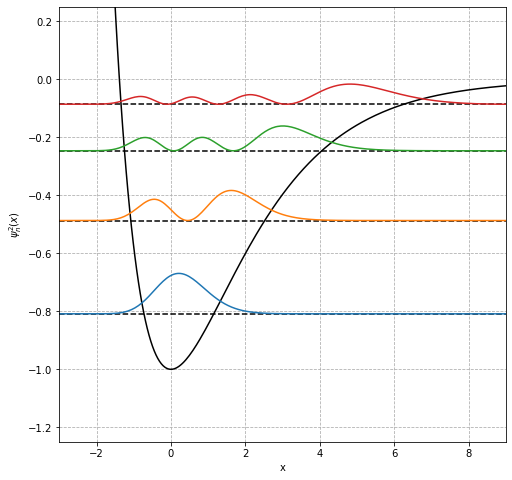

In [31]:
# graph of Morse eigenstates probability densities
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(-3,9)
plt.ylim(-1.25,0.25)
plt.plot(Xi,vi,color='black')
i=0
for i in range(0,4):
    plt.plot(Xi,(Psi[i]/np.sqrt(Lc))**2*10+eigval[i]/(s*s*alpha))
    plt.hlines(eigval[i]/(s*s*alpha),A,B,color='black',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')